# Day1
Familiarising with the project and bring back knowledge of datacamp course so today only cleaning and analysing of data happen.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
<class 'pandas.core.frame.Dat

C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\1732480217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col[new_col.isin(miss_char)] = np.nan
C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\1732480217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col[new_col.isin(miss_char)] = np.nan
C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\1732480217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col[new_col.isin(m

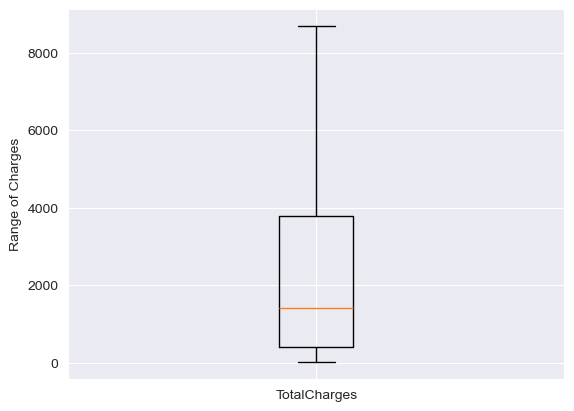

0


In [2]:
import pandas as pd
import numpy as np

churn_data = pd.read_csv('churn_data.csv')
miss_char = [' ','NaN',""]
print(churn_data.isna().sum())
for col in churn_data.columns:
    new_col = churn_data[col]
    new_col[new_col.isin(miss_char)] = np.nan
    churn_data[col] = new_col

print(churn_data.isna().sum())
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

churn_data['SeniorCitizen'] = churn_data['SeniorCitizen'].replace({0:'No',1:'Yes'})

print(churn_data.info())
#for outlier
q1 = np.quantile(churn_data['TotalCharges'],0.25)
q3 = np.quantile(churn_data['TotalCharges'],0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outlier_all = churn_data[(churn_data['TotalCharges'] < lower) | (churn_data['TotalCharges'] > upper)]
if outlier_all.empty:
    print("it has no outlier")
else:
    print("it has outliers")

#so there is no outlier means i have to fill the null by means
total_charges_mean = churn_data['TotalCharges'].mean()
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(total_charges_mean)


#there is also another way to see outlier using the boxplots
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.boxplot(churn_data['TotalCharges'])
ax.set_xticklabels(['TotalCharges'])

ax.set_ylabel('Range of Charges')
plt.show()

#check for duplicate values
print(churn_data.duplicated().sum())


# print(churn_data['SeniorCitizen'])

C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\212220618.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_data['Churn'] = churn_data['Churn'].replace({'Yes':1,'No':0})
C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\212220618.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2[0,1].set_xticklabels(new_data['tenure'],rotation=90)
C:\Users\Deku\AppData\Local\Temp\ipykernel_8624\212220618.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2[1,0].set_xticklabels(churn_data['PaymentMethod'],rotation=90)


  tenure      Month
0   <= 8  55.286599
1  <= 16  56.840137
2  <= 24  57.775576
3  <= 32  58.944795
4  <= 40  59.675233
5  <= 48  60.481453
6  <= 56  61.528111
7  <= 64  62.562824
8  <= 72  64.761692


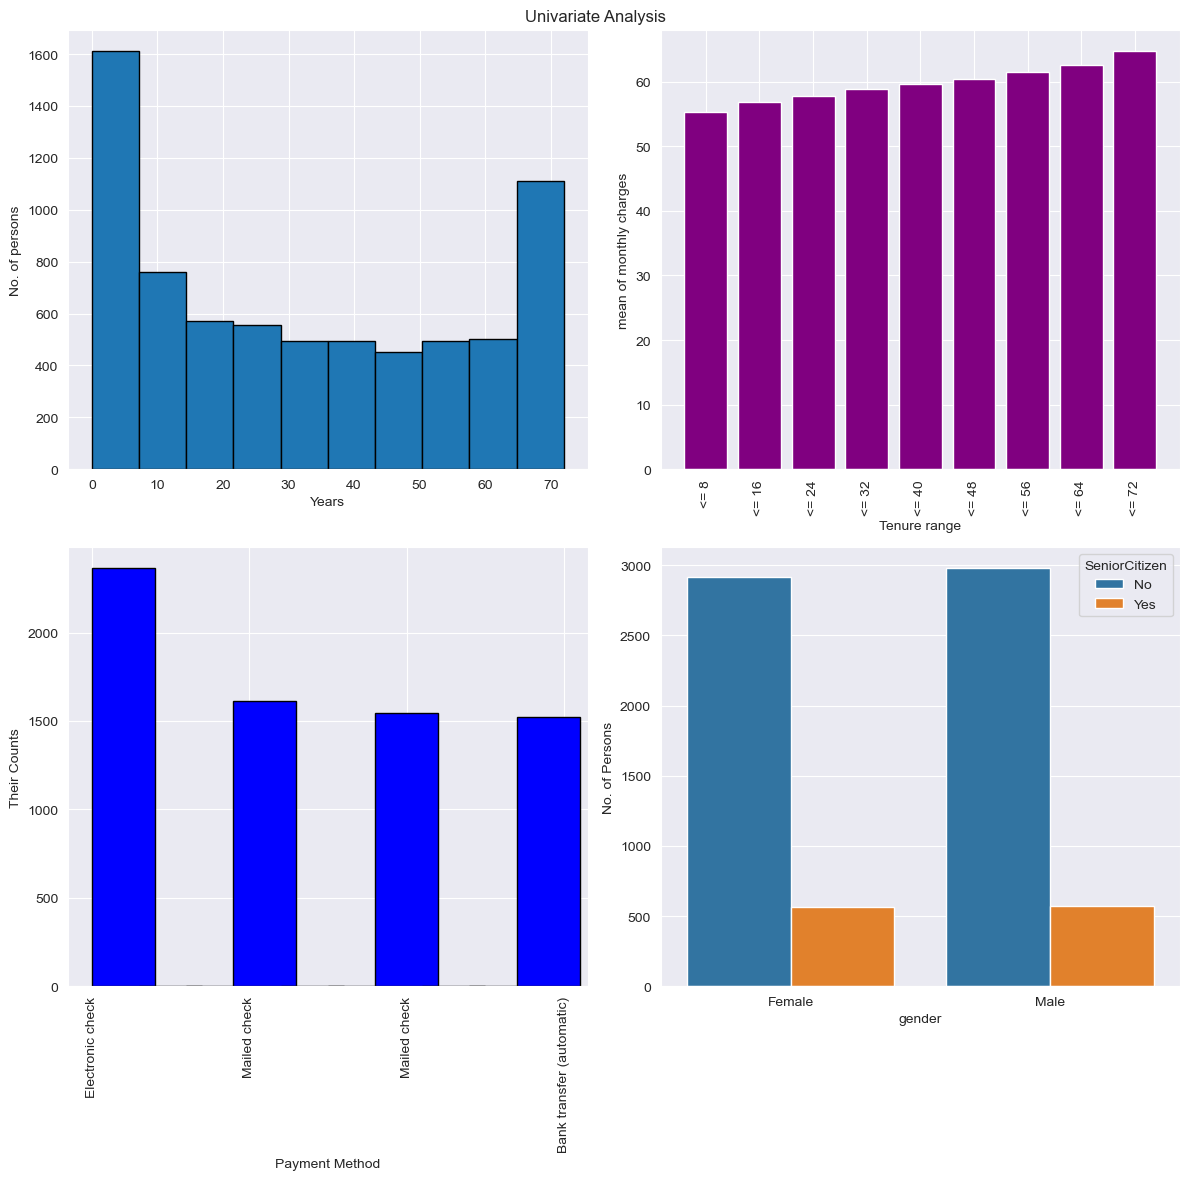

      tenure  MonthlyCharges
936        0           80.85
753        0           20.25
5218       0           19.70
3826       0           25.35
488        0           52.55
...      ...             ...
6400      72           59.75
6386      72           83.55
7037      72           21.15
7039      72          103.20
28        72           90.25

[7043 rows x 2 columns]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [3]:
import seaborn as sns

churn_data['Churn'] = churn_data['Churn'].replace({'Yes':1,'No':0})
churn_data['Churn'] = churn_data['Churn'].astype(object)
g_gender = churn_data.groupby(['gender','SeniorCitizen'])['SeniorCitizen'].agg({'count'})

fig2,ax2 = plt.subplots(2,2,figsize=(12,12))
fig2.suptitle('Univariate Analysis')

sns.barplot(x='gender',y='count',data=g_gender,hue='SeniorCitizen')
plt.ylabel('No. of Persons')

ax2[0,0].hist([churn_data['tenure']],edgecolor='black')
ax2[0,0].set_xlabel('Years')
ax2[0,0].set_ylabel('No. of persons')
# ax2[0,0].grid(True,axis='x')
tenure = churn_data[['tenure','MonthlyCharges']]
tenure = tenure.sort_values('tenure',ascending=True)
new_data = {'tenure':[],'Month':[]}
for i in range(8,73,8):
    count = 0
    month = 0
    new_data['tenure'].append(f'<= {i}')
    for row,lab in tenure.iterrows():

        if lab['tenure'] <= i:
            month += lab['MonthlyCharges']
            count += 1
    new_data['Month'].append(month/count)
new_data = pd.DataFrame(new_data)
fig.set_size_inches([20,10])
ax2[0,1].bar(new_data['tenure'],new_data['Month'],color='purple')
ax2[0,1].set_xticklabels(new_data['tenure'],rotation=90)
ax2[0,1].set_xlabel('Tenure range')
ax2[0,1].set_ylabel('mean of monthly charges')

ax2[1,0].hist(churn_data['PaymentMethod'],edgecolor='black',width=0.4,color='blue')
ax2[1,0].set_xticklabels(churn_data['PaymentMethod'],rotation=90)
ax2[1,0].set_xlabel('Payment Method')
ax2[1,0].set_ylabel('Their Counts')
print(new_data)


plt.tight_layout()
plt.show()
print(tenure)
# print(churn_data.info())
churn_data

0.8247573156351038
936      <8
753      <8
5218     <8
3826     <8
488      <8
       ... 
739     <72
745     <72
746     <72
6358    <72
759     <72
Name: tenure, Length: 7043, dtype: object
                       count
Churn InternetService       
0     DSL               1962
      Fiber optic       1799
      No                1413
1     DSL                459
      Fiber optic       1297
      No                 113


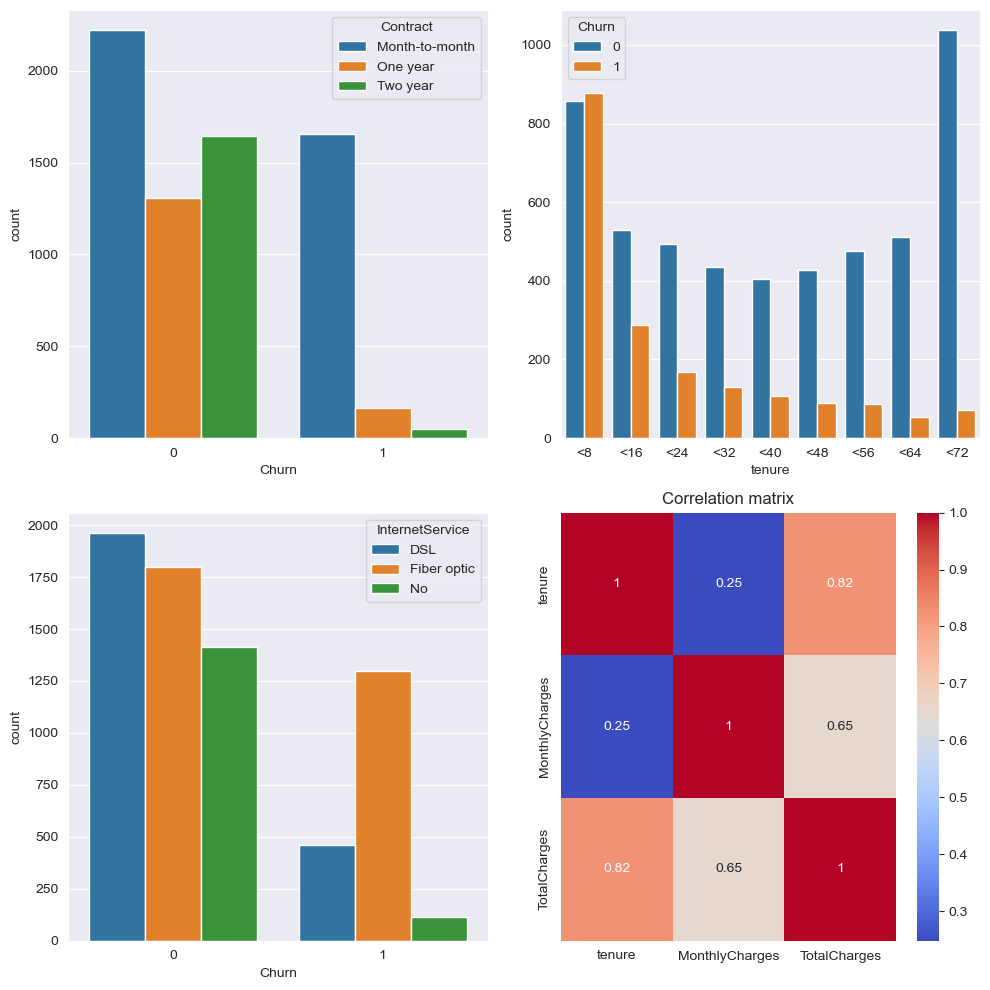

<Figure size 1000x1000 with 0 Axes>

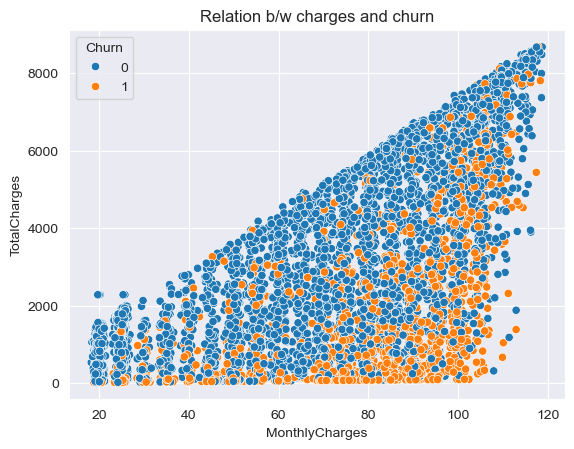

In [81]:
#bivariate analysis
work_data = churn_data[['tenure','MonthlyCharges','TotalCharges','Churn']]
work_data = work_data.sort_values('tenure',ascending=True)
corr_tenure_month = work_data[['tenure','MonthlyCharges','TotalCharges']].corr()
corr_tenure_total = work_data['tenure'].corr(work_data['TotalCharges'])
print(corr_tenure_total)
arr = []
for lab in work_data['tenure']:
        i=0

        t = lab%8
        if t != 0:
            k = lab
            i = int(k/8) + 1
            i = i*8
        else:
            if lab == 0:
                i = 8
            else:
                k = lab
                i=int(k/8)*8




        arr.append(f"<{i}")



np_arr = np.array(arr)
work_data = work_data.sort_values('tenure')
work_data['tenure'] = np_arr
print(work_data['tenure'])

fig3,ax3 = plt.subplots(2,2,figsize=(10,10))
# ax3[0,0].scatter(work_data['tenure'],work_data['MonthlyCharges'])
sns.heatmap(corr_tenure_month,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')

g_churn1 = churn_data.groupby(['Churn','Contract'],as_index=False)['Contract'].agg({'count'})
sns.barplot(x='Churn',y='count',data=g_churn1,hue='Contract',ax=ax3[0,0])

g_churn2 = work_data.groupby(['tenure','Churn'],sort=False)['Churn'].agg({'count'})
sns.barplot(x='tenure',y='count',data=g_churn2,hue='Churn',ax=ax3[0,1])
working_data2 = churn_data[['PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]
# g_churn3 = churn_data.groupby(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn'])['Churn'].agg({'count'})
melt_work = working_data2.melt(id_vars=['Churn'],value_vars=['PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],var_name='feature',value_name='values')
g_churn3 = melt_work.groupby(['Churn','feature','values'])['values'].agg({'count'})


g_churn4 = churn_data.groupby(['Churn','InternetService'])['InternetService'].agg({'count'})
sns.barplot(x='Churn',y='count',hue='InternetService',data=g_churn4,ax=ax3[1,0])
print(g_churn4)


plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
g=sns.catplot(data=g_churn3,x='Churn',y='count',hue='values',col='feature',kind='bar',height = 20,aspect=1.5,col_wrap=2)
g.set_titles(size=70)
for ax in g.axes.flat:
    ax.set_xlabel('Churn',fontsize=70)
    ax.set_ylabel('Count',fontsize=70)
    ax.tick_params(axis='x',labelsize=50)
    ax.tick_params(axis='y',labelsize=50)
g.legend.set_title("Feature value")
g.legend.get_title().set_fontsize(80)
g.legend.set_bbox_to_anchor((1.05,1))

for label in g.legend.get_texts():
    label.set_fontsize(60)
# handles,_ = g.axes.get_legend_handles_labels()
# legend =ax.get_legend()
# for handle in legend.legendHandles:
#     handle.set_markeredgewidth(50)
#     handle.set_markersize(50)
plt.subplots_adjust(top=0.9,hspace=0.2,wspace=0.2)

plt.suptitle('All features churn count',fontsize=80)

plt.show()

sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=churn_data,hue='Churn')
plt.title('Relation b/w charges and churn')
plt.show()

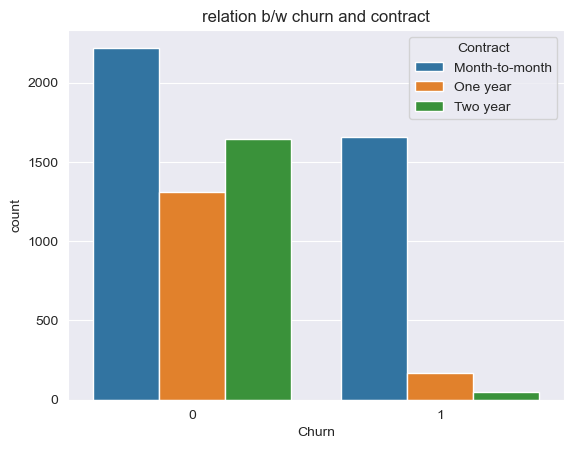

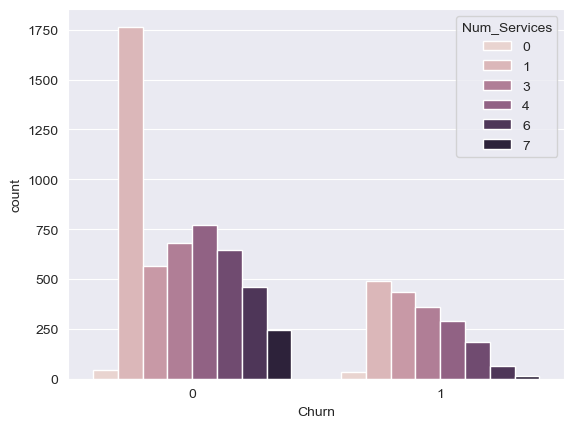

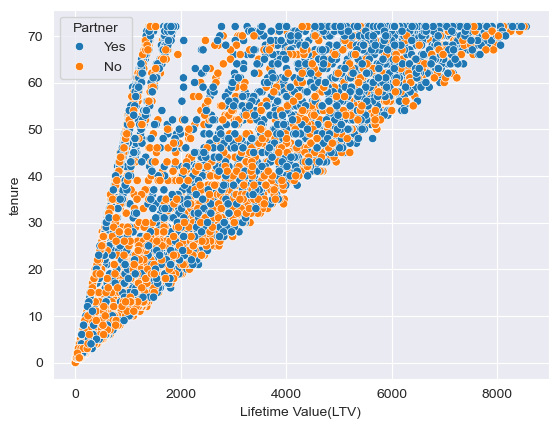

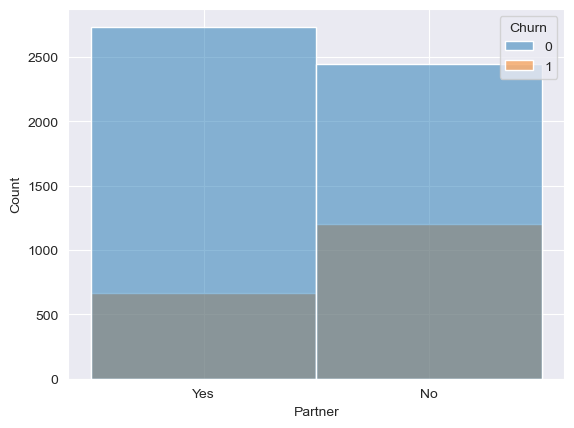

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Lifetime Value(LTV),Num_Services
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.85,1
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,1936.30,3
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,107.70,3
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1903.50,3
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,141.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2035.20,6
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,7430.40,5
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,325.60,1
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,297.60,1


In [103]:
#feature enginerring

#lifetime score
churn_data['Lifetime Value(LTV)'] = churn_data['tenure']*churn_data['MonthlyCharges']

g_churn5 = churn_data.groupby(['Churn','Contract'])['Contract'].agg({'count'})
sns.barplot(x='Churn',y='count',hue='Contract',data=g_churn5)
plt.title('relation b/w churn and contract')
plt.show()
# 'PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
arr =[]
for row,lab in churn_data.iterrows():
    i=0
    if(lab['PhoneService'] == 'Yes'):
        i += 1
    if(lab['OnlineSecurity'] == 'Yes'):
        i += 1
    if(lab['OnlineBackup'] == 'Yes'):
        i += 1
    if(lab['DeviceProtection'] == 'Yes'):
        i += 1
    if(lab['TechSupport'] == 'Yes'):
        i += 1
    if(lab['StreamingTV'] == 'Yes'):
        i += 1
    if(lab['StreamingMovies'] == 'Yes'):
        i += 1
    arr.append(i)
np_arr = np.array(arr)
churn_data['Num_Services'] = np_arr

g_churn6 = churn_data.groupby(['Churn','Num_Services'])['Num_Services'].agg({'count'})
sns.barplot(x='Churn',y='count',hue='Num_Services',data=g_churn6)
churn_data['Num_Services'] = churn_data['Num_Services'].astype(object)

plt.show()
sns.scatterplot(x='Lifetime Value(LTV)',y='tenure',hue='Partner',data=churn_data)
plt.show()

sns.histplot(x='Partner',hue='Churn',data=churn_data)
plt.show()
churn_data